In [7]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Reading the data in

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/Mr-MeerMoazzam/Machine-Learning/main/FuelConsumptionData.csv")

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Exploration

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


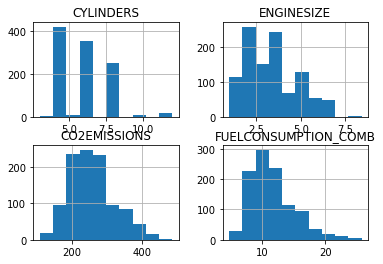

In [11]:
vis = new_df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vis.hist()
plt.show()

Now, Let's plot each of these features against the emission, to see how linear their realtionship is:

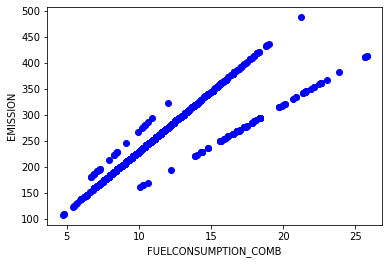

In [12]:
plt.scatter(new_df.FUELCONSUMPTION_COMB,new_df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSION")
plt.show()


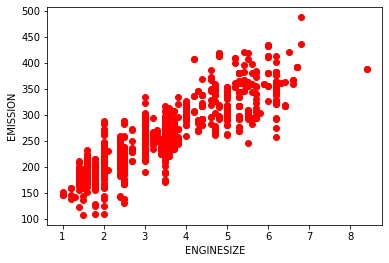

In [13]:
plt.scatter(new_df.ENGINESIZE,new_df.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()

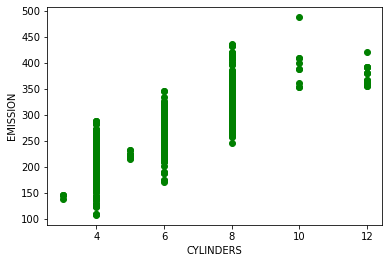

In [14]:
plt.scatter(new_df.CYLINDERS,new_df.CO2EMISSIONS, color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSION")
plt.show()

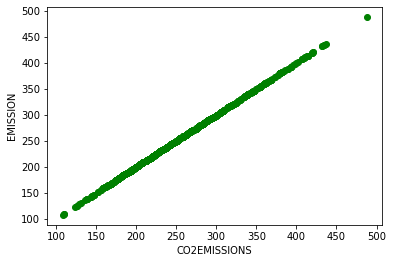

In [15]:
plt.scatter(new_df.CO2EMISSIONS,new_df.CO2EMISSIONS, color='green')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("EMISSION")
plt.show()

# Creating train and test dataset

In [16]:
mask = np.random.rand(len(df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

# Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1,...Bn) to minimize the 'residual sum of squres'between the actual value y in the dataset, and the predicted value that using linear approximation

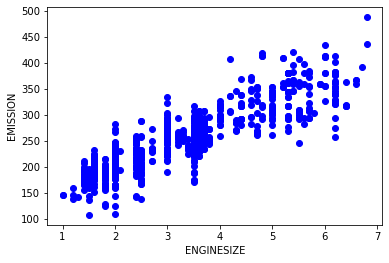

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
plt.show()


# Modeling

Using sklearn package to model data.

In [19]:
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print('coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

coefficients: [[39.01828694]]
Intercept: [125.53248668]
